In [25]:
import matplotlib
import pandas as pd
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import re
from datetime import datetime


%matplotlib inline
    


%matplotlib inline
url1 = "https://raw.githubusercontent.com/docju/datasciencecapstone/main/results.csv"
download1 = requests.get(url1).content

df = pd.read_csv(io.StringIO(download1.decode('ISO-8859-1')))
df['date']=pd.to_datetime(df['DateTime'])
df['outcome']=df['FTHG']-df['FTAG']

def result(n):
    if n >0:
        res=1
    if n==0:
        res=0
    if n<0:
        res=-1
    return res

df['result']=df.apply(lambda x: result(x['outcome']),axis=1)
all_results=df[['Season','date','HomeTeam','AwayTeam','FTHG','FTAG','outcome','result']][~df['Season'].isin(['2020-21','2021-22'])]

print(all_results.head())

    Season       date     HomeTeam        AwayTeam  FTHG  FTAG  outcome  \
0  1993-94 1993-08-14      Arsenal        Coventry     0     3       -3   
1  1993-94 1993-08-14  Aston Villa             QPR     4     1        3   
2  1993-94 1993-08-14      Chelsea       Blackburn     1     2       -1   
3  1993-94 1993-08-14    Liverpool  Sheffield Weds     2     0        2   
4  1993-94 1993-08-14     Man City           Leeds     1     1        0   

   result  
0      -1  
1       1  
2      -1  
3       1  
4       0  


In [8]:
def split_season_train_test (season,test,input_df=all_results):
    '''
    This function takes data from a particular season and splits it into training and test samples
    
    INPUT:
    input_df - (dataframe) input matrix containing results of all seasons
    season - (string) season to split
    test - (int) number of rows that constitute the test data frame
    
    OUTPUT:
    season_train - (dataframe) a dataframe containing only the non-test rows
    season_test - (dataframe) a dataframe containing the test rows
    '''
    train=input_df[input_df['Season']==season].shape[0]-test
    season_train=input_df[input_df['Season']==season].copy().head(train)
    season_test=input_df[input_df['Season']==season].copy().tail(test)

    return season_train, season_test

train,test=split_season_train_test('2019-20',92)
print(test)

        Season                date          HomeTeam          AwayTeam  FTHG  \
10332  2019-20 2020-06-17 18:00:00       Aston Villa  Sheffield United     0   
10333  2019-20 2020-06-17 20:15:00          Man City           Arsenal     3   
10334  2019-20 2020-06-19 18:00:00           Norwich       Southampton     0   
10335  2019-20 2020-06-19 20:15:00         Tottenham        Man United     1   
10336  2019-20 2020-06-20 12:30:00           Watford         Leicester     1   
10337  2019-20 2020-06-20 15:00:00          Brighton           Arsenal     2   
10338  2019-20 2020-06-20 17:30:00          West Ham            Wolves     0   
10339  2019-20 2020-06-20 19:45:00       Bournemouth    Crystal Palace     0   
10340  2019-20 2020-06-21 14:00:00         Newcastle  Sheffield United     3   
10341  2019-20 2020-06-21 16:15:00       Aston Villa           Chelsea     1   
10342  2019-20 2020-06-21 19:00:00           Everton         Liverpool     0   
10343  2019-20 2020-06-22 20:00:00      

In [4]:
df2=covid_season_pre_break.copy()
output = np.asmatrix(df2.groupby(['HomeTeam', 'AwayTeam'])['outcome'].max().unstack())

df3=covid_season_post_break.copy()
output_post = np.asmatrix(df3.groupby(['HomeTeam', 'AwayTeam'])['outcome'].max().unstack())

 
 

NameError: name 'covid_season_pre_break' is not defined

In [9]:
def result_1(n):
    if n==1:
        res=3
    if n==0:
        res=1
    if n==-1:
        res=0
    return res


def table_create(season, scores=all_results):
    period=scores[all_results['Season']==season].copy()
    period['home_points']=period.apply(lambda x: result_1(x['result']),axis=1)
    period['away_points']=period.apply(lambda x: result_1(-1*x['result']),axis=1)
    period['home_gd']=period['outcome']
    period['away_gd']=-1*period['outcome']
    period['home_games']=1
    period['away_games']=1
    home_games=period.groupby('HomeTeam').sum()['home_games']
    away_games=period.groupby('AwayTeam').sum()['away_games']
    home_sum=period.groupby('HomeTeam').sum()['home_points']
    away_sum=period.groupby('AwayTeam').sum()['away_points']
    home_gd=period.groupby('HomeTeam').sum()['home_gd']
    away_gd=period.groupby('AwayTeam').sum()['away_gd']
    home_goals=period.groupby('HomeTeam').sum()['FTHG']
    away_goals=period.groupby('AwayTeam').sum()['FTAG']
    points_total=pd.concat([home_games,away_games,home_sum,away_sum, home_gd,away_gd,home_goals,away_goals],axis=1)
    points_total.index.name='Team'
    points_total=points_total.reset_index()
    points_total['Played']=points_total['home_games']+points_total['away_games']
    points_total['GF']=points_total['FTHG']+points_total['FTAG']
    points_total['GD']=points_total['home_gd']+points_total['away_gd']
    points_total['Points']=points_total['home_points']+points_total['away_points']
    points_total=points_total[['Played','Team','GF','GD','Points']].sort_values(['Points','GD','GF','Team'],ascending=[False,False,False,True])   
    
    return points_total



train_matrix = np.asmatrix(train.groupby(['HomeTeam', 'AwayTeam'])['result'].max().unstack())

    

In [10]:
def FunkSVD(ratings_mat, latent_features=4, learning_rate=0.0001, iters=500):
    '''
    This function performs matrix factorization using a basic form of FunkSVD with no regularization
    
    INPUT:
    ratings_mat - (numpy array) a matrix with users as rows, movies as columns, and ratings as values
    latent_features - (int) the number of latent features used
    learning_rate - (float) the learning rate 
    iters - (int) the number of iterations
    
    OUTPUT:
    user_mat - (numpy array) a user by latent feature matrix
    movie_mat - (numpy array) a latent feature by movie matrix
    '''
    
    # Set up useful values to be used through the rest of the function
    n_users = ratings_mat.shape[0]
    n_movies = ratings_mat.shape[1]
    num_ratings = np.count_nonzero(~np.isnan(ratings_mat)) #-n_users
    
    # initialize the user and movie matrices with random values
    home_mat = np.random.rand(n_users, latent_features)
    away_mat = np.random.rand(latent_features, n_movies)
    
    # initialize sse at 0 for first iteration
    sse_accum = 0
    
    # header for running results
    print("Optimizaiton Statistics")
    print("Iterations | Mean Squared Error ")
    #print(home_mat)
    #print(away_mat)
    # for each iteration
    for iteration in range(iters):

        # update our sse
        old_sse = sse_accum
        sse_accum = 0
        
        # For each user-movie pair
        for i in range(n_users):
            for j in range(n_movies):
 
                
                # if the rating exists
                if pd.isna(ratings_mat[i,j]) is False:
                    
                    # compute the error as the actual minus the dot product of the user and movie latent features
                    diff = ratings_mat[i, j] - np.dot(home_mat[i, :], away_mat[:, j])
                    
                    # Keep track of the sum of squared errors for the matrix
                    sse_accum += diff**2
                    
                    # update the values in each matrix in the direction of the gradient
                    for k in range(latent_features):
                        home_mat[i, k] += learning_rate * (2*diff*away_mat[k, j])
                        away_mat[k, j] += learning_rate * (2*diff*home_mat[i, k])

        # print results for iteration
        if iteration in {0,1,iters-1}:
            print("%d \t\t %f" % (iteration+1, sse_accum / num_ratings))
        
    return home_mat, away_mat 

In [11]:
home_mat,away_mat=FunkSVD(train_matrix,latent_features=20,learning_rate=0.005, iters=500)

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 10.608190
2 		 2.714049
500 		 0.000000


In [12]:
result_matrix=np.dot(home_mat, away_mat)
home_results=result_matrix.copy()


for i in range(0,20):
    for j in range(0,20):
        if i==j: 
            home_results[i,j]=0
        elif i!=j and result_matrix[i,j]>=0:
            home_results[i,j]=1+2*result_matrix[i,j]
        elif i!=j and result_matrix[i,j]<0:
            home_results[i,j]=1+result_matrix[i,j]


def away_version(result_matrix):
    n=len(result_matrix)
    new_mat=result_matrix.copy()
    for i in range(n):
        for j in range(n):
            if i==j:
                new_mat[i,j]=0
            elif i!=j:
                new_mat[i,j]=-result_matrix[i,j]                
            
    new_mat_t=np.transpose(new_mat)
    return new_mat_t

away=away_version(result_matrix)
away_results=away.copy()

for i in range(0,20):
    for j in range(0,20):
        if i==j: 
            away_results[i,j]=0
        elif i!=j and away[i,j]>=0:
            away_results[i,j]=1+2*away[i,j]
        elif i!=j and away[i,j]<0:
            away_results[i,j]=1+away[i,j]


print(home_results[1])
print(result_matrix[1]-train_matrix[1])
print(away_results[1])
print(away[1])
for i in range(0,20):
    print(sum(home_results[i]+away_results[i]))


[  1.75364700e+00   0.00000000e+00  -3.86871683e-05   3.00024806e+00
   1.00009683e+00   2.20313184e+00   1.49662554e+00   2.99954398e+00
   4.67054021e-04   1.40542969e-04   1.01869845e-04  -6.53739065e-03
   2.99945906e+00   3.00043111e+00   9.86885197e-01  -6.07647800e-04
  -1.40433297e-04   2.99997149e+00   1.00089684e+00   6.51480344e-01]
[[             nan              nan  -3.86871683e-05   1.24032384e-04
    4.84143503e-05              nan              nan  -2.28010692e-04
    4.67054021e-04   1.40542969e-04   1.01869845e-04              nan
   -2.70468078e-04   2.15555294e-04              nan  -6.07647800e-04
   -1.40433297e-04  -1.42571215e-05   4.48421823e-04              nan]]
[ -5.10491627e-05   0.00000000e+00   2.30508531e-05   1.00001113e+00
   3.00034718e+00  -8.62364826e-05   6.74896672e-05   9.75389287e-02
   1.32727535e-06  -1.36791081e+00   2.83356695e-05   9.99913876e-01
   4.41073827e-01   2.99947833e+00  -8.33740466e-05  -8.50909884e-05
   9.12377142e-06  -1.1831

In [13]:
matrix_svd = np.asmatrix(all_results[all_results['Season']=='2019-20'].groupby(['HomeTeam', 'AwayTeam'])['result'].max().unstack().fillna(-2))

u, s, vt =np.linalg.svd(matrix_svd)
print(s)
s_new, u_new, vt_new = np.diag(s[:20]), u[:, :20], vt[:20, :]
print( np.around(np.dot(np.dot(u_new, s_new), vt_new)))


[ 8.06129763  6.89475401  6.20347011  6.00068856  5.88287215  4.99292557
  4.81097699  4.69205922  4.27082243  3.73780096  3.39285498  2.98768246
  2.85005051  2.42027207  2.08392654  1.70527034  1.1604546   0.80514205
  0.60342009  0.22162054]
[[-2.  1.  1. -1.  1. -1.  0.  1. -0.  1. -1.  1.  1.  1. -0. -0. -0.  1.
   1. -0.]
 [ 1. -2. -1.  1.  0. -1.  1.  1. -1. -1. -1. -1.  1.  1.  0. -1. -1.  1.
   0. -1.]
 [-0.  1. -2.  1. -1.  0. -1.  1.  1. -1. -1.  1. -1. -0. -0. -1. -0. -1.
   0. -1.]
 [ 1.  0.  1. -2.  0.  0. -1.  1. -1. -1. -1. -1. -0.  1. -1. -1.  1.  0.
   0.  0.]
 [-0. -1.  1. -1. -2. -1. -1.  1.  1. -1. -1. -1.  1.  1.  0.  1.  0.  1.
   1.  0.]
 [-0.  1. -1.  1.  1. -2.  1.  1.  0. -1.  1. -1.  1.  1. -0. -1.  1.  1.
  -1.  1.]
 [-0.  1.  1.  0. -1. -1. -2.  0. -1. -1. -1. -1.  1.  1. -1. -1. -0.  1.
   1.  0.]
 [-0.  0. -1.  1.  1.  1.  1. -2.  1.  0. -1.  0.  0. -1. -1. -0. -0.  1.
   1.  1.]
 [ 1.  1.  1.  0.  1.  0.  1.  1. -2. -1. -1. -1.  1.  0.  1. -1.  1.  1.
 

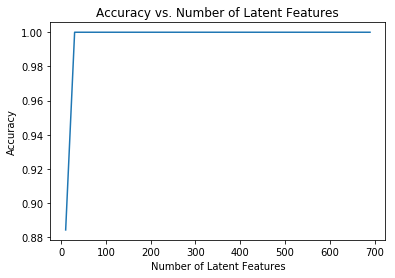

In [14]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(matrix_svd, user_item_est)
    
    
    for i in range(0,20):
        for j in range(0,20):
            if i==j: 
                diffs[i,j]=0
            

    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/all_results[all_results['Season']=='2019-20'].shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

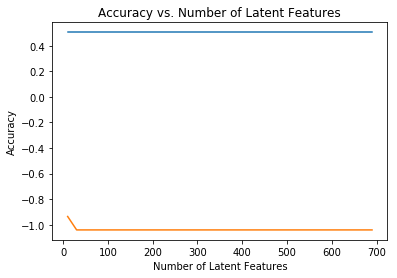

In [15]:
matrix_svd_train = np.asmatrix(train.groupby(['HomeTeam', 'AwayTeam'])['result'].max().unstack().fillna(-2))
matrix_svd_test = np.asmatrix(test.groupby(['HomeTeam', 'AwayTeam'])['result'].max().unstack().fillna(-2))

u, s, vt =np.linalg.svd(matrix_svd_train)


num_latent_feats = np.arange(10,700+10,20)
sum_errs = []
sum_errs_test=[]

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est_train = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    user_item_est_test = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(matrix_svd_train, user_item_est)
    diffs_test = np.subtract(matrix_svd_test, user_item_est_test)
    
    
    for i in range(0,20):
        for j in range(0,20):
            if i==j: 
                diffs[i,j]=0
                diffs_test[i,j]=0
            

    
    # total errors and keep track of them
    err_train = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err_train)
    err_test = np.sum(np.sum(np.abs(diffs_test)))
    sum_errs_test.append(err_test)
    
    


plt.plot(num_latent_feats, 1 - np.array(sum_errs)/(matrix_svd_train.shape[0]*matrix_svd_train.shape[1]));
plt.plot(num_latent_feats, 1 - np.array(sum_errs_test)/(matrix_svd_test.shape[0]*matrix_svd_test.shape[1]));
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

In [41]:

#keep most recent entry

#all_results.groupby(["HomeTeam","AwayTeam"], as_index=False).max()
teams=all_results[all_results['Season']!='2019-20']['HomeTeam'].unique()


most_recent=all_results[all_results['Season']!='2019-20'].sort_values('date').drop_duplicates(['HomeTeam','AwayTeam'],keep='last')
average_results=all_results[all_results['Season']!='2019-20'].groupby(['HomeTeam','AwayTeam']).mean()['result'].reset_index()

most_recent_matrix=np.asmatrix(average_results.groupby(['HomeTeam', 'AwayTeam'])['result'].max().unstack().fillna(-2))

def table_create(scores=most_recent):
    #period=scores[all_results['Season']==season].copy()
    period=scores.copy()
    period['home_points']=period.apply(lambda x: result_1(x['result']),axis=1)
    period['away_points']=period.apply(lambda x: result_1(-1*x['result']),axis=1)
    period['home_gd']=period['outcome']
    period['away_gd']=-1*period['outcome']
    period['home_games']=1
    period['away_games']=1
    home_games=period.groupby('HomeTeam').sum()['home_games']
    away_games=period.groupby('AwayTeam').sum()['away_games']
    home_sum=period.groupby('HomeTeam').sum()['home_points']
    away_sum=period.groupby('AwayTeam').sum()['away_points']
    home_gd=period.groupby('HomeTeam').sum()['home_gd']
    away_gd=period.groupby('AwayTeam').sum()['away_gd']
    home_goals=period.groupby('HomeTeam').sum()['FTHG']
    away_goals=period.groupby('AwayTeam').sum()['FTAG']
    points_total=pd.concat([home_games,away_games,home_sum,away_sum, home_gd,away_gd,home_goals,away_goals],axis=1)
    points_total.index.name='Team'
    points_total=points_total.reset_index()
    points_total['Played']=points_total['home_games']+points_total['away_games']
    points_total['GF']=points_total['FTHG']+points_total['FTAG']
    points_total['GD']=points_total['home_gd']+points_total['away_gd']
    points_total['Points']=points_total['home_points']+points_total['away_points']
    points_total=points_total[['Played','Team','GF','GD','Points']].sort_values(['Points','GD','GF','Team'],ascending=[False,False,False,True])   
    
    return points_total


def split_season_train_test (test,input_df):
    '''
    This function takes data from a particular season and splits it into training and test samples
    
    INPUT:
    input_df - (dataframe) input matrix containing results of all seasons
    season - (string) season to split
    test - (int) number of rows that constitute the test data frame
    
    OUTPUT:
    season_train - (dataframe) a dataframe containing only the non-test rows
    season_test - (dataframe) a dataframe containing the test rows
    '''
    train=input_df.shape[0]-test
    season_train=input_df.copy().head(train)
    season_test=input_df.copy().tail(test)

    return season_train, season_test

train,test=split_season_train_test(92,most_recent)


In [34]:
most_recent_matrix=np.asmatrix(train.groupby(['HomeTeam', 'AwayTeam'])['result'].max().unstack().fillna(-2))
most_recent_test=np.asmatrix(test.groupby(['HomeTeam', 'AwayTeam'])['result'].max().unstack().fillna(-2))


In [42]:
print(most_recent_matrix)

[[-2.          0.43478261  1.         ...,  0.75        0.          0.6       ]
 [-0.43478261 -2.         -1.         ..., -0.375       0.28571429  0.        ]
 [-1.         -1.         -2.         ..., -2.          1.         -2.        ]
 ..., 
 [-0.5        -0.375      -2.         ..., -2.         -2.          0.33333333]
 [-0.57142857  0.14285714  1.         ..., -2.         -2.         -2.        ]
 [-0.6        -0.75       -2.         ..., -0.33333333 -2.         -2.        ]]
